In [1]:
#imported all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#with help of pandas library we are reading file
data=pd.read_csv("C:\\Users\\sam\\Downloads\\Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#checking dimenssion
data.shape

(167, 10)

In [4]:
#Data type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#checking if any missing value
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# scaling data according to gdpp
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [7]:
#correlation of dataset
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

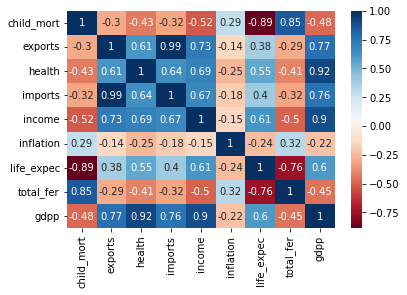

In [8]:
#with the help of heatmap plotting correlation
sns.heatmap(data.corr(),cmap='RdBu',annot=True)

<AxesSubplot:>

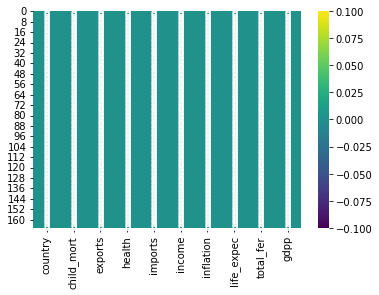

In [9]:
#visualizing any null values with help of heatmap
sns.heatmap(data=data.isnull(),cmap='viridis',annot=True)

Text(0, 0.5, 'health')

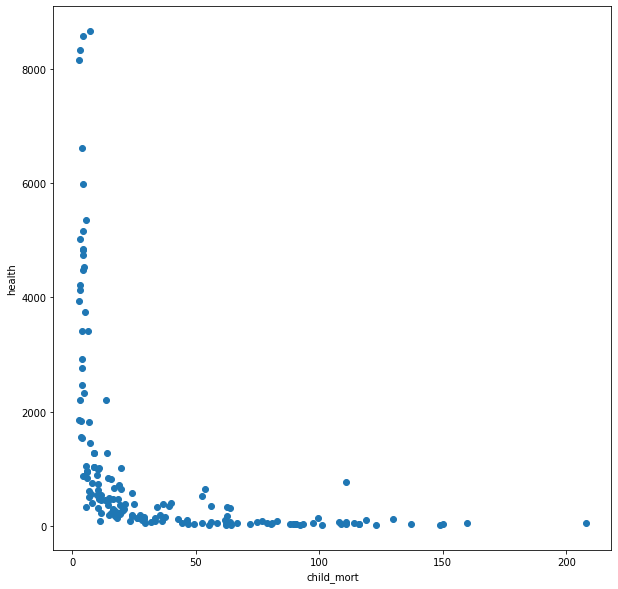

In [10]:
#plotting scatter plot child_mort against health 
plt.figure(figsize=(10,10))
plt.scatter(x ='child_mort',y ='health', data=data)
plt.xlabel('child_mort')
plt.ylabel('health')

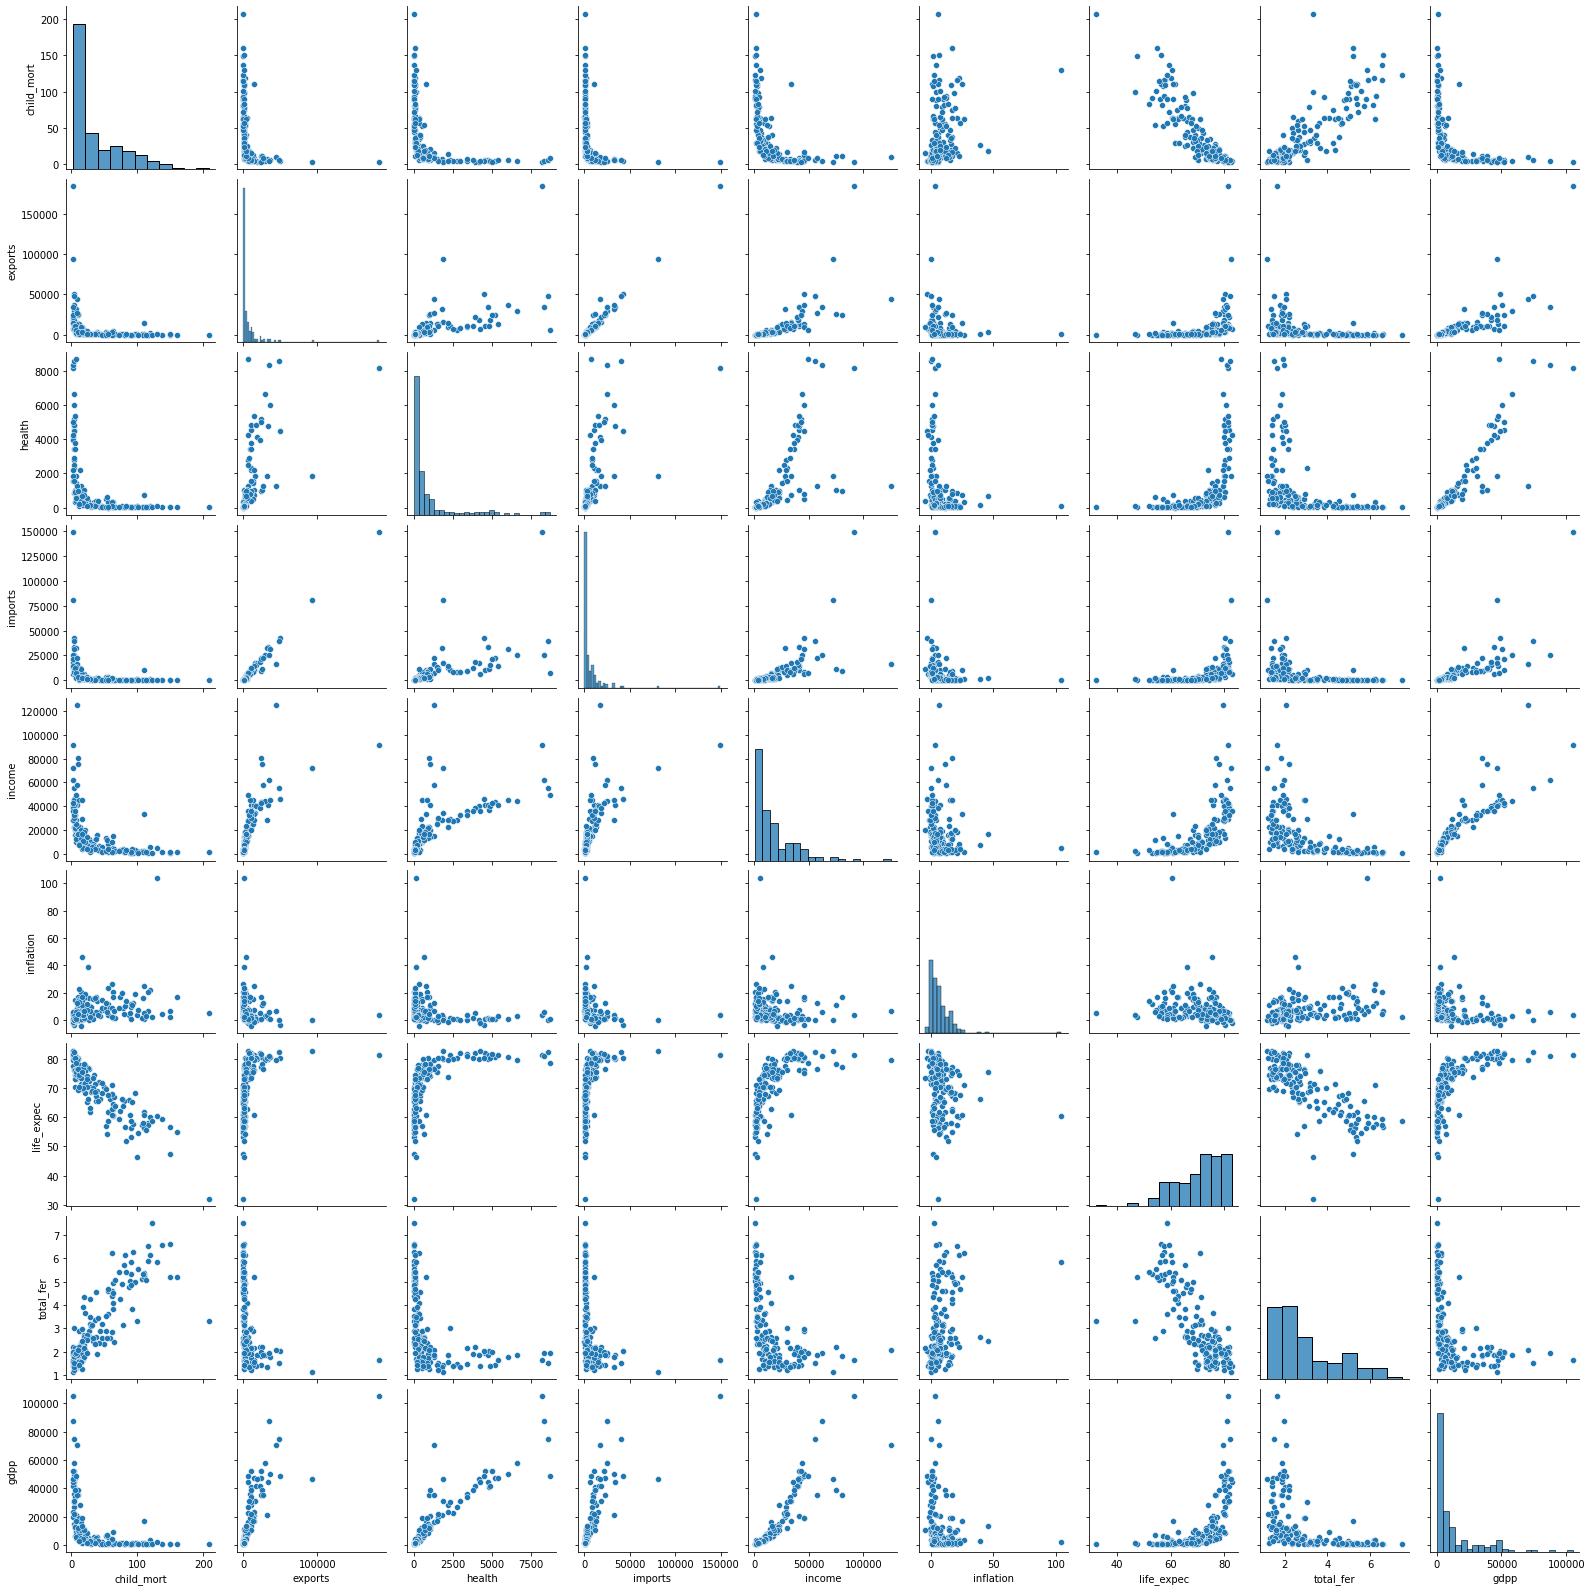

In [11]:
#plotting pairplot to visualize dataset
sns.pairplot(data)

In [12]:
#drop dependent feature
x=data.drop(labels=['country'],axis=1)

In [13]:
#top 5 records of independent feature
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [14]:
y=data['country']
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [15]:
#converting categorical feature to numeric feature
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [16]:
#converting numpy array to pandas dataframe
y_trans=pd.DataFrame(y)
y_trans.head()

,0
0,0
1,1
2,2
3,3
4,4


In [17]:
#scaling dataset with range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
scaled_data=sc.fit_transform(x)

In [18]:
#numpy array converted to dataframe
x = pd.DataFrame(scaled_data, columns=[x.columns])

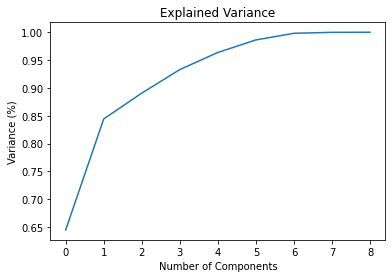

In [19]:
#pca to convert dataset higher dimenssion to lower dimenssion
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [20]:
#variance between features
pca.explained_variance_

array([1.63296240e-01, 5.04553056e-02, 1.17421371e-02, 1.07046165e-02,
       7.77991208e-03, 5.69365956e-03, 3.02093746e-03, 4.28592532e-04,
       4.40223095e-05])

In [21]:
#converting numpy array to dataframe
x_pca = pd.DataFrame({'PC1':principalComponents[0],'PC2':principalComponents[1],'PC3':principalComponents[2],'PC4':principalComponents[3],'PC5':principalComponents[4],'PC6':principalComponents[5],'PC7':principalComponents[6],'PC8':principalComponents[7],'PC9':principalComponents[8]})

In [22]:
#Dropping some features which are not that much correlated 
x_pca = x_pca.drop(columns = ['PC5','PC6','PC7','PC8','PC9'])
x_pca.head()

,PC1,PC2,PC3,PC4
0,-0.577524,0.094155,-0.025532,-0.614971
1,0.229501,-0.274654,-0.150250,0.327219
2,-0.017381,-0.010361,0.054556,0.051076
3,-0.034431,0.021956,-0.114602,-0.100355
4,-0.059960,-0.005648,0.015200,0.029039


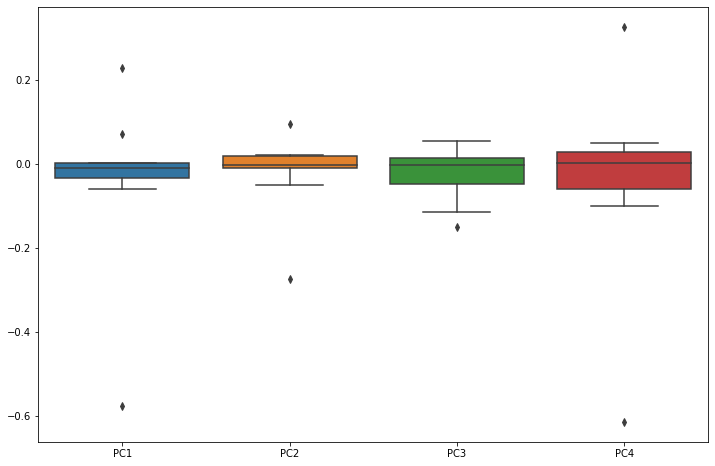

In [23]:
#plotting boxplot to see outliers
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=x_pca)
plt.show()

In [24]:
#IQR for outliers pc1
q1=x_pca['PC1'].quantile(0.25)
q3=x_pca['PC1'].quantile(0.75)
iqr=q3-q1
lower_1=q1-(1.5*iqr)
upper_1=q3+(1.5*iqr)
   

In [25]:
#IQR for outliers pc2
q1=x_pca['PC2'].quantile(0.25)
q3=x_pca['PC2'].quantile(0.75)
iqr=q3-q1
lower_2=q1-(1.5*iqr)
upper_2=q3+(1.5*iqr)

In [26]:
#IQR for outliers pc3
q1=x_pca['PC3'].quantile(0.25)
q3=x_pca['PC3'].quantile(0.75)
iqr=q3-q1
lower_3=q1-(1.5*iqr)
upper_3=q3+(1.5*iqr)

In [27]:
#IQR for outliers pc4
q1=x_pca['PC4'].quantile(0.25)
q3=x_pca['PC4'].quantile(0.75)
iqr=q3-q1
lower_4=q1-(1.5*iqr)
upper_4=q3+(1.5*iqr)

In [28]:
No_outlier_PC1=x_pca[(x_pca['PC1']>lower_1) & (x_pca['PC1']<upper_1)]
No_outlier_PC2=x_pca[(x_pca['PC2']>lower_2) & (x_pca['PC2']<upper_2)]
No_outlier_PC3=x_pca[(x_pca['PC3']>lower_3) & (x_pca['PC3']<upper_3)]
No_outlier_PC4=x_pca[(x_pca['PC4']>lower_4) & (x_pca['PC4']<upper_4)]

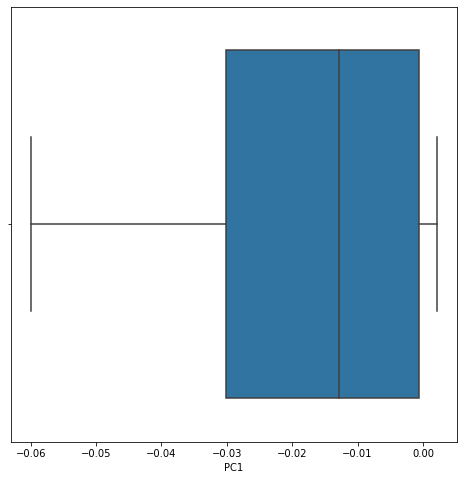

In [29]:
#plotting boxplot to check weather there is outliers
fig = plt.figure(figsize = (8,8))
sns.boxplot((No_outlier_PC1['PC1']))
plt.show()

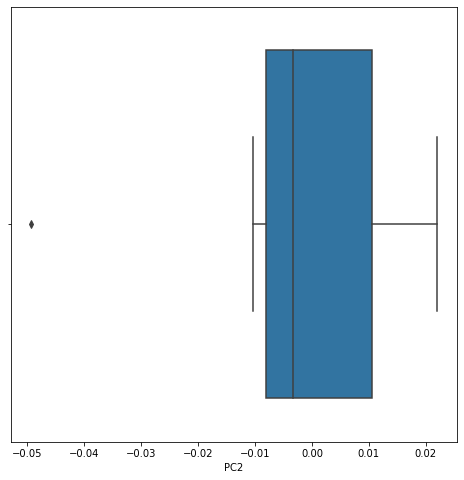

In [30]:
#plotting boxplot to check weather there is outliers
fig = plt.figure(figsize = (8,8))
sns.boxplot((No_outlier_PC2['PC2']))
plt.show()

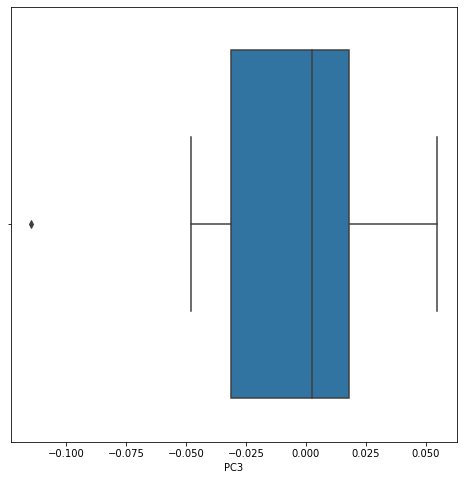

In [31]:
#plotting boxplot to check weather there is outliers
fig = plt.figure(figsize = (8,8))
sns.boxplot((No_outlier_PC3['PC3']))
plt.show()

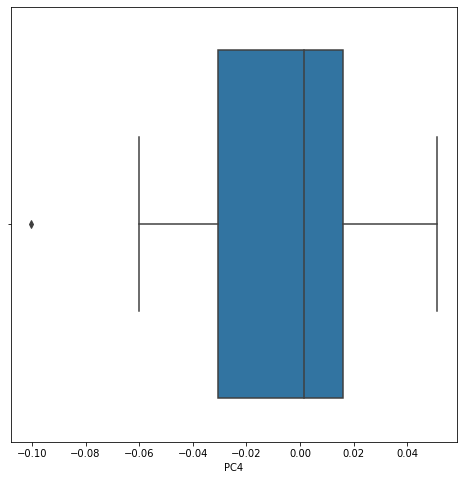

In [32]:
#plotting boxplot to check weather there is outliers
fig = plt.figure(figsize = (8,8))
sns.boxplot((No_outlier_PC4['PC4']))
plt.show()

In [33]:
print(No_outlier_PC1)

        PC1       PC2       PC3       PC4
2 -0.017381 -0.010361  0.054556  0.051076
3 -0.034431  0.021956 -0.114602 -0.100355
4 -0.059960 -0.005648  0.015200  0.029039
5 -0.008401  0.020161  0.026455  0.001339
7  0.002061  0.000846  0.008019 -0.000879
8  0.002116 -0.003301 -0.003070  0.002877


In [34]:
x=pd.DataFrame({
    'pc1':[No_outlier_PC1]
})

In [35]:
x.head()

,pc1
0,PC1 PC2 PC3 PC4 2 -0...


In [ ]:
x.shape

In [ ]:
x_pca.shape

In [ ]:
# KMeans through finding out number of cluster to visualize Elbow method 
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=7)
     
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.show()

In [ ]:
#finding out silhouette_score through number of cluster
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(x)
    sse_.append([k, silhouette_score(x, kmeans.labels_)])

In [ ]:
#finding out silhouette_score through number of cluster
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(x)
    
    cluster_labels = kmeans.labels_
    
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [ ]:
# K-Means model with 2 clusters
kmeans2=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=7)
kmeans2.fit(x)
labels=kmeans2.labels_
correct_label2=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_label2, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_label2/float(y.size)))

In [ ]:
kmeans2.inertia_

In [ ]:
# K-Means model with 3 clusters

k_means3 = KMeans(n_clusters=3,max_iter = 400, n_init = 10, random_state=7)

k_means3.fit(x)

# check how many of the samples were correctly labeled
labels = k_means3.labels_

correct_labels3 = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels3, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels3/float(y.size)))

In [ ]:
k_means3.inertia_

In [ ]:
# K-Means model with 3 clusters
kmeans4=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=7)
kmeans4.fit(x)
labels=kmeans4.labels_
correct_label4=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_label4, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_label4/float(y.size)))

In [ ]:
kmeans4.inertia_

In [ ]:
  # Percentage of points that are outliers
from sklearn.cluster import DBSCAN
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2)
    dbscan.fit(x)
   
  
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [ ]:
#fitting model
dbscan = DBSCAN(eps=0.4,min_samples=2)
dbscan.fit(x)

In [ ]:
dbscan.labels_

In [ ]:
# finding out number of clusters and number of noise
db = DBSCAN(eps = 0.080, min_samples = 4).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

In [ ]:
#plotting hierarchy dendrogram fig
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(x, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [ ]:
# fitting hierarchical_cluster model
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(x)

In [ ]:
hierarchical_cluster.labels_

In [ ]:
#visualizing child_mort Vs Health with help of country by the subplot
plt.subplots(figsize=(12,6))
sns.scatterplot(x='child_mort',y='health',hue='country',data=data,markers='*')